<img src="mmu_logo.png" style="height: 80px;" align=left> 

# Learning Objectives

Towards the end of this lesson, you should be able to:
- experiments with 2 different feature selection algorithms
- define different ways to evaluate a model


### Load Libraries

In [3]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from tqdm import tqdm 

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)

# Feature Selection

### Function for Ranking Feature

This is a function to do the ranking of the variables

In [4]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

### Read Dataset

In [12]:
df = pd.read_csv("banking.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

### One-Hot Encoding

In [14]:
# your codes here...
from sklearn.preprocessing import OneHotEncoder
col_list = [col for col in df.columns.tolist() if df[col].dtype.name== "object"]
df_oh=df[col_list]
df=df.drop(col_list,1)
df_oh=pd.get_dummies(df_oh)
df=pd.concat([df,df_oh],axis=1)
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Separate into X, y

In [15]:
y = df.y
X = df.drop("y", 1)
colnames = X.columns

### Prepare Boruta classifier

In [19]:
# using the BorutaPy function
# your codes here...
rf = RandomForestClassifier(n_jobs=-1,
                           class_weight="balanced_subsample",
                           max_depth= 5)
feat_selector = BorutaPy(rf,n_estimators="auto",random_state=1)

### Fit Boruta classifier to data

In [20]:
# your codes here...
feat_selector.fit(X.values,y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                          max_depth=5, n_estimators=146,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F4A7BE2A740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F4A7BE2A740)

### Get the ranking of the features returned by Boruta

In [21]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

### Top and Bottom 10 features


In [22]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,age,1.0
18,job_student,1.0
61,poutcome_nonexistent,1.0
60,poutcome_failure,1.0
54,month_sep,1.0
53,month_oct,1.0
51,month_may,1.0
50,month_mar,1.0
49,month_jun,1.0
45,month_apr,1.0


---------Bottom 10----------


,Features,Score
41,loan_unknown,0.25
21,job_unknown,0.25
20,job_unemployed,0.19
42,loan_yes,0.14
38,housing_unknown,0.14
31,education_professional.course,0.14
14,job_management,0.08
25,marital_unknown,0.06
30,education_illiterate,0.03
36,default_yes,0.00


### Plot it out

Text(0.5, 1.0, 'Boruta all Features')

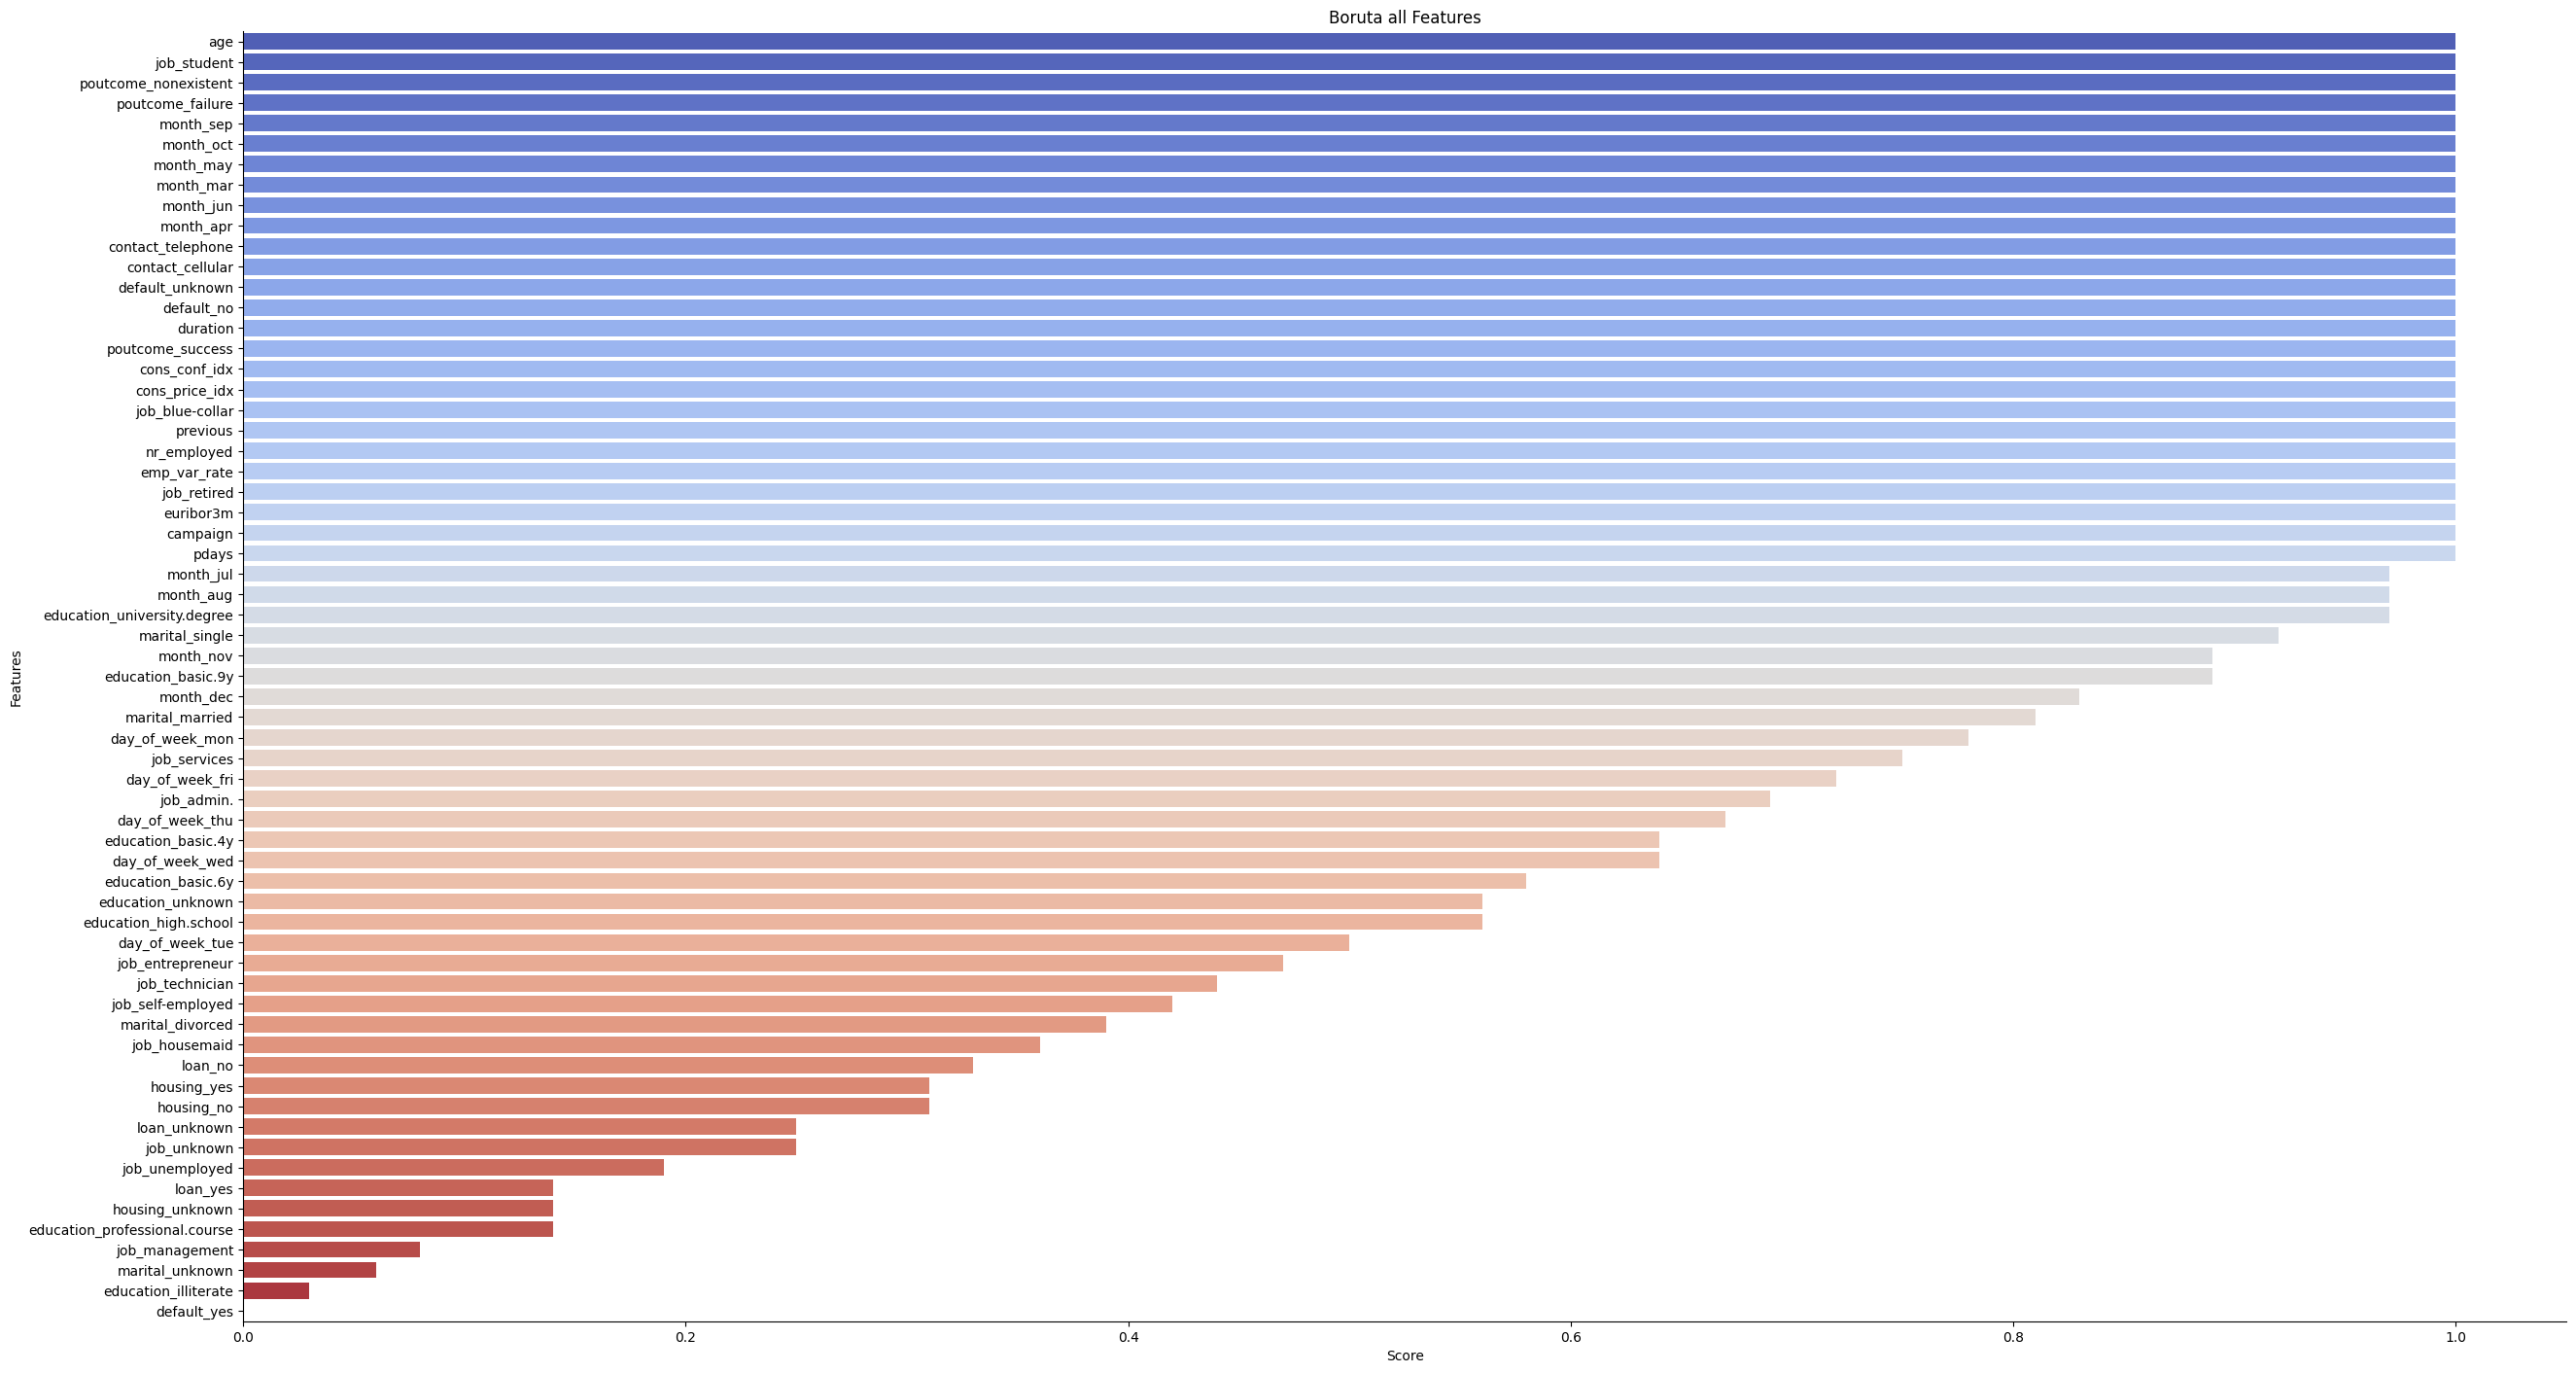

In [23]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

## RFE

### Prepare RFE classifier

In [27]:
# Your Task:
# Try the following params:
# 1. class_weight={0:1,1:2}
# 2. class_weight="balanced"
# 3. max_depth=4
# 4. max_depth=6
# 5. n_estimators = 100
# observe the feature importance ranking.

# your codes here...
rf = RandomForestClassifier(n_jobs=-1,
                           class_weight="balanced_subsample",
                           max_depth= 5,
                           n_estimators=50)
rf.fit(X,y)
rfe=RFECV(rf,min_features_to_select=1, cv=3)


### Fit RFE classifier to data

In [28]:
rfe.fit(X, y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                       max_depth=5, n_estimators=50,
                                       n_jobs=-1))

### Get the ranking of the features returned by RFE

In [30]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

### Plot it out

Text(0.5, 1.0, 'RFE bottom-10 Features')

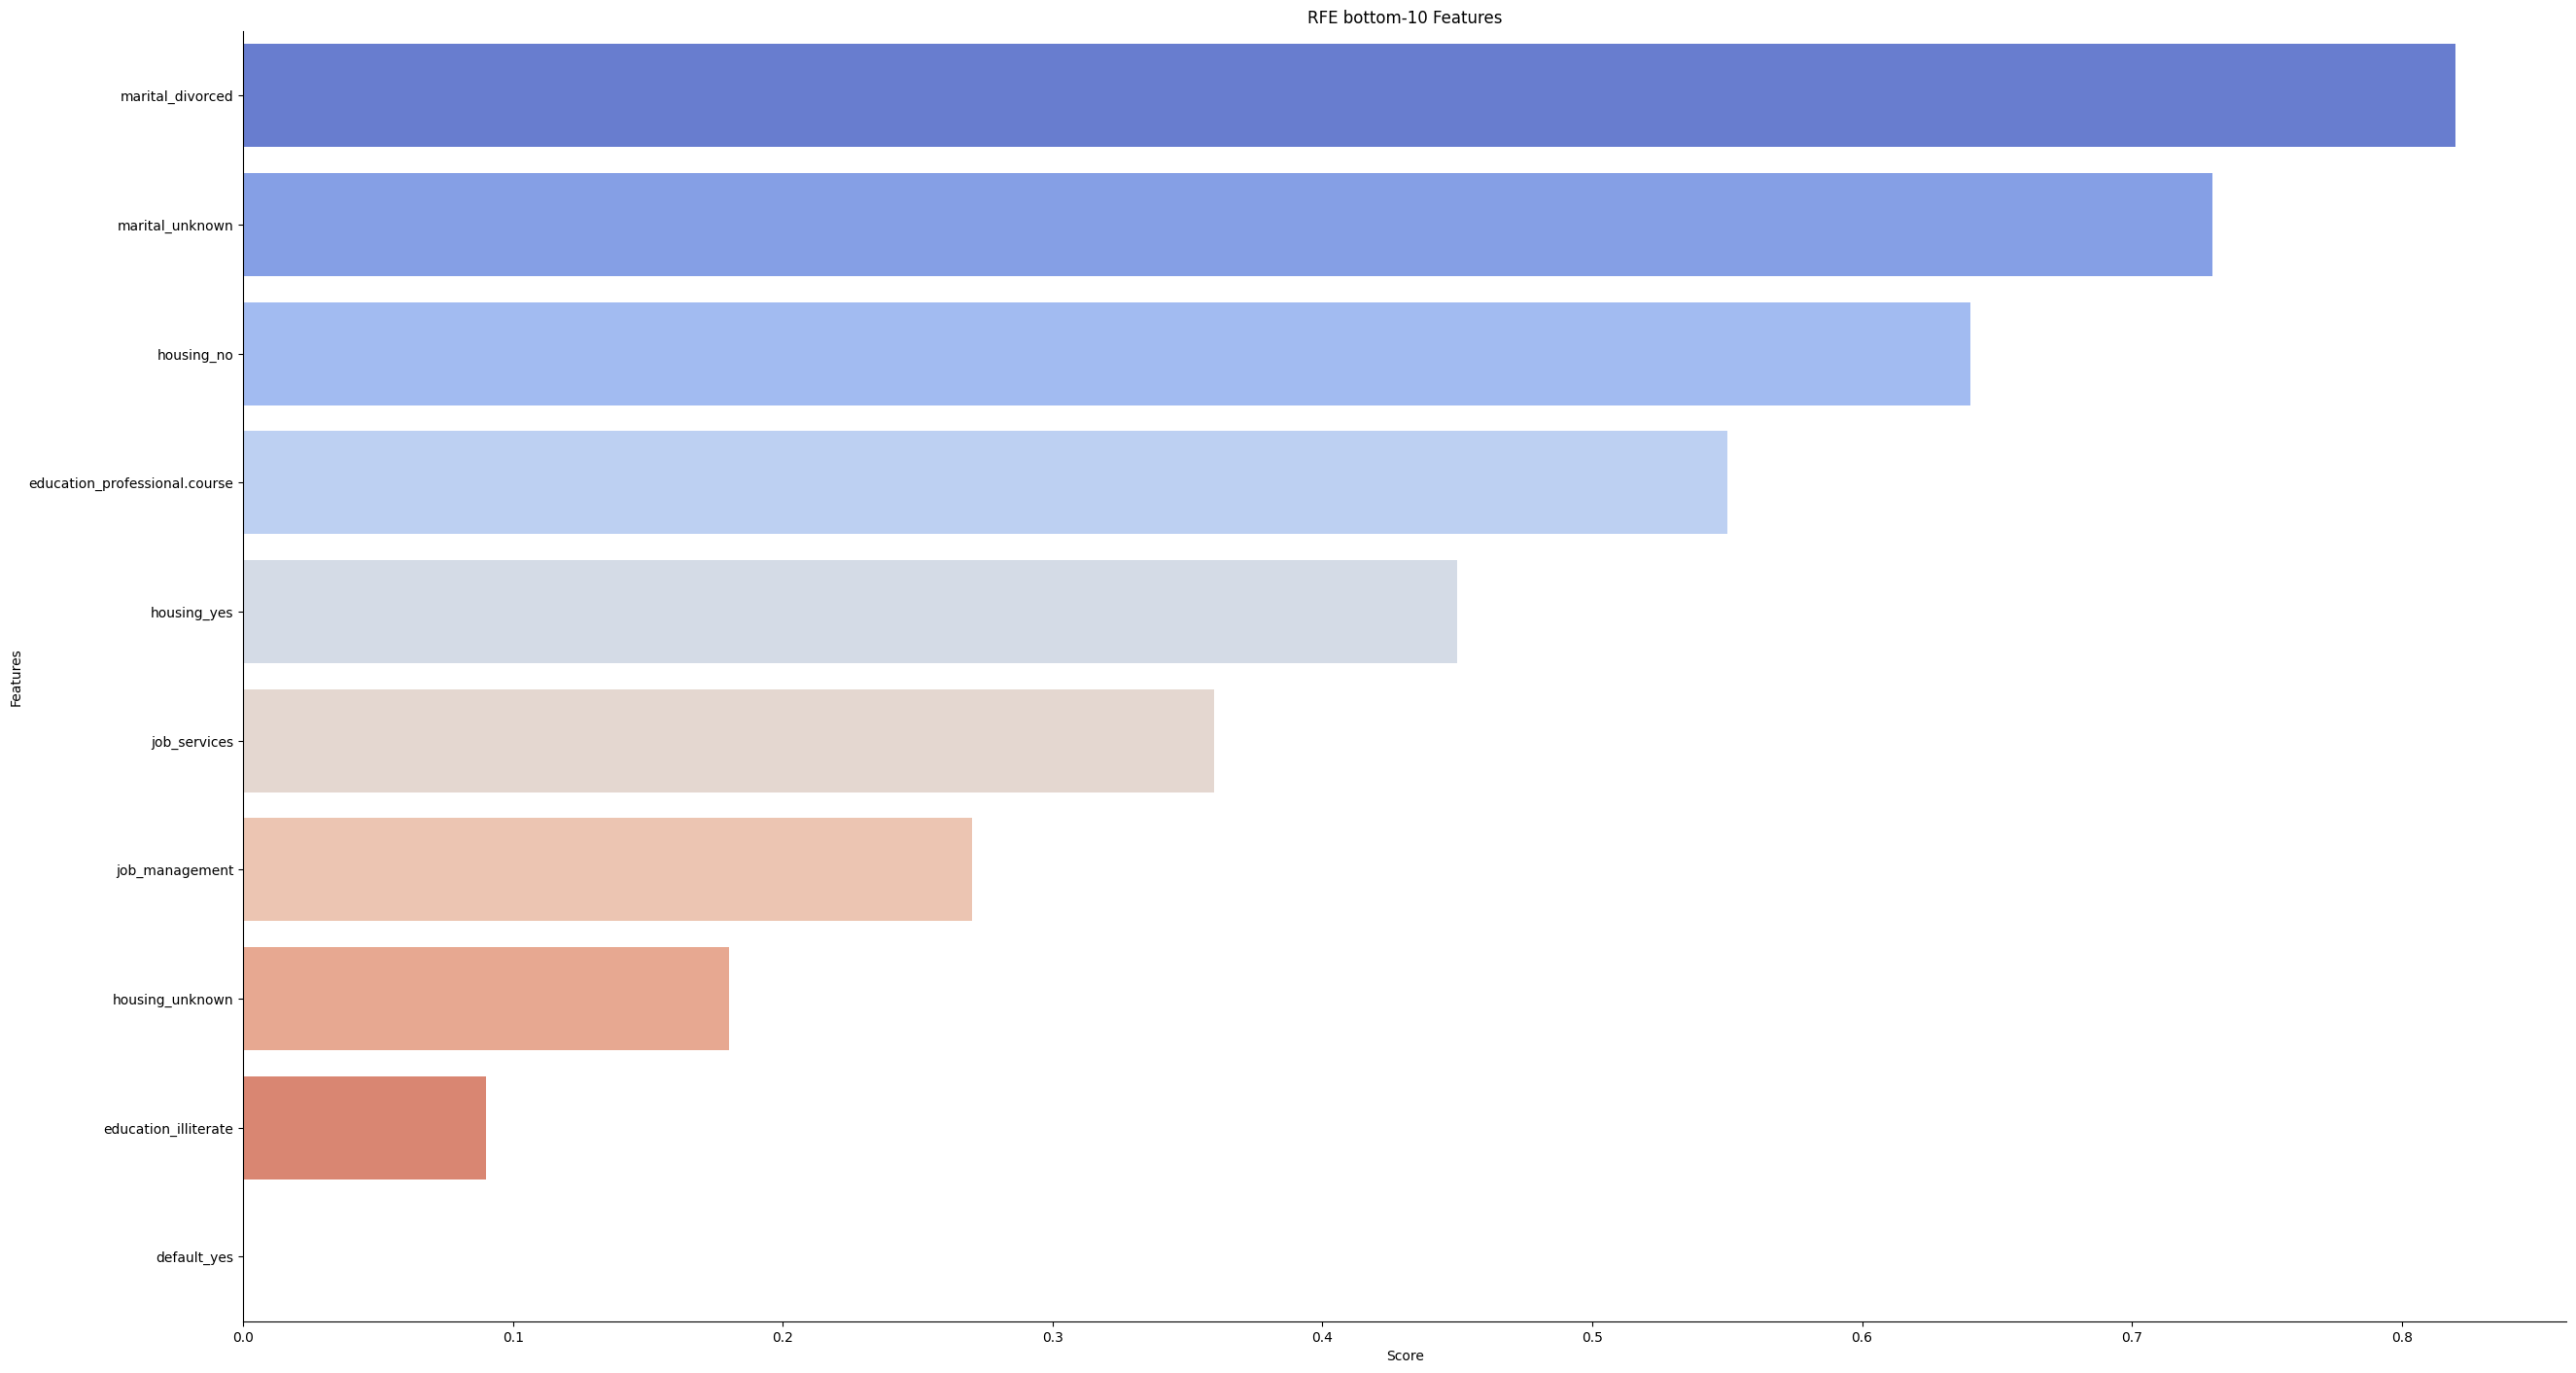

In [31]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[-10:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE bottom-10 Features")

# Modeling

In [36]:
# Setup model list using only NB and DT

model_list = ["NB", "DT"]
feature_num, acc_nb, acc_dt = [], [], []

for i in range(1, 30):
    feature_num.append(i)
    for model in model_list:
        
        # Create X and y dataset
        y = df.y
        X = df.drop("y", axis = 1)
        
        cols = boruta_score.Features[0:i]
        X = X[cols].copy()
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        
        if model == "NB":
            clf = GaussianNB()
        elif model == "DT":
            clf = DecisionTreeClassifier(max_depth=3) 
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = round((accuracy_score(y_test, y_pred)*100), 2)
        
        if model == "NB":
            acc_nb.append(acc)
        elif model == "DT":
            acc_dt.append(acc) 
            
# your codes here...
boruta_acc_result=pd.DataFrame(list(zip(feature_num,
                                        acc_nb,
                                        acc_dt)),
                                        columns=["No_Of_Features",
                                                "NB",
                                                "DT"])

boruta_acc_result=pd.melt(boruta_acc_result,
                         id_vars = "No_Of_Features",
                         var_name = "Model",
                         value_name="Accuracy")

[Text(0.5, 1.0, 'Accuracy Trend for Different Classifiers (Boruta)')]

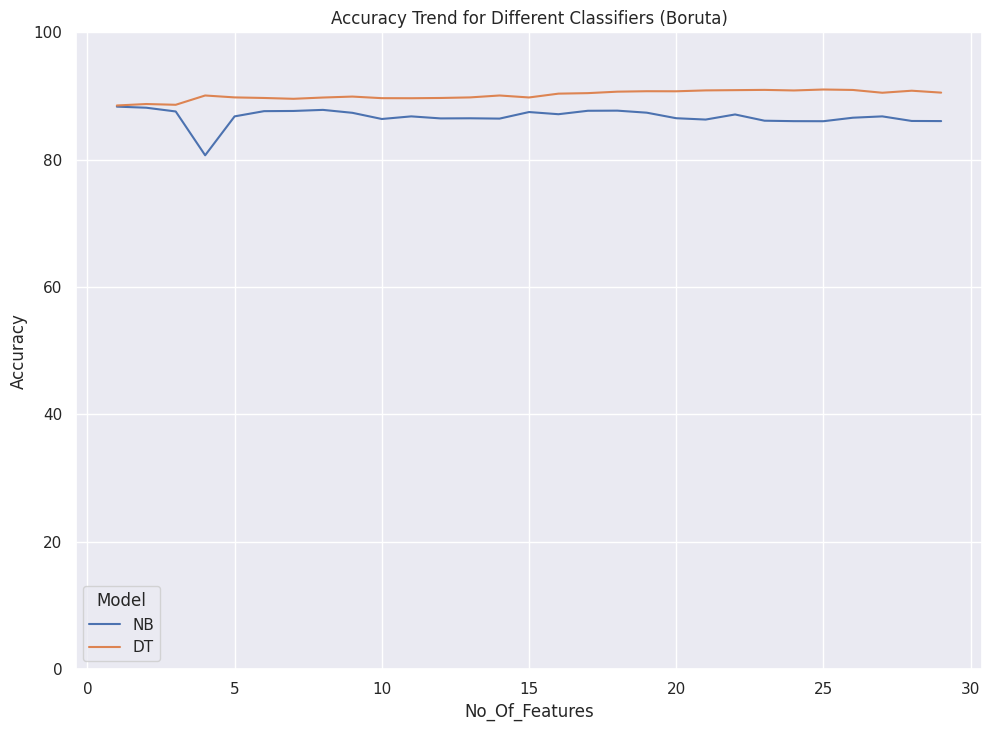

In [37]:
# Plot the line charts

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(x = "No_Of_Features", y = "Accuracy", hue = "Model", data = boruta_acc_result)
ax.set(ylim=(0, 100))
ax.set(title="Accuracy Trend for Different Classifiers (Boruta)")

In [65]:
# Get the model accuracy using different number of features

# your codes here...
boruta_acc_result[boruta_acc_result["Model"]=="NB"]["Accuracy"].mean()
boruta_acc_result[boruta_acc_result["Model"]=="DT"]["Accuracy"].mean()
#nb_accuracy=boruta_acc_result["Model"=="NB"]
#dt_accuracy=boruta_acc_result["Model"=="DT"].mean()
#boruta_acc_result

90.32693877551021

# Model Evaluation

In [66]:
# Read dataset

df = pd.read_csv('banking.csv') 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [67]:
# Prepare X and y

df_X = df.drop('y', axis=1)
y = df['y']

In [68]:
# dummification of variables
df_X=pd.get_dummies(df_X)
df_X

# your codes here...


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [69]:
X.columns

Index(['age', 'job_student', 'poutcome_nonexistent', 'poutcome_failure',
       'month_sep', 'month_oct', 'month_may', 'month_mar', 'month_jun',
       'month_apr', 'contact_telephone', 'contact_cellular', 'default_unknown',
       'default_no', 'duration', 'poutcome_success', 'cons_conf_idx',
       'cons_price_idx', 'job_blue-collar', 'previous', 'nr_employed',
       'emp_var_rate', 'job_retired', 'euribor3m', 'campaign', 'pdays',
       'month_jul', 'month_aug', 'education_university.degree',
       'marital_single', 'month_nov', 'education_basic.9y', 'month_dec',
       'marital_married', 'day_of_week_mon', 'job_services', 'day_of_week_fri',
       'job_admin.', 'day_of_week_thu', 'education_basic.4y',
       'day_of_week_wed', 'education_basic.6y', 'education_unknown',
       'education_high.school', 'day_of_week_tue', 'job_entrepreneur',
       'job_technician', 'job_self-employed', 'marital_divorced'],
      dtype='object')

In [70]:
X.head()

,age,job_student,poutcome_nonexistent,poutcome_failure,month_sep,month_oct,month_may,month_mar,month_jun,month_apr,contact_telephone,contact_cellular,default_unknown,default_no,duration,poutcome_success,cons_conf_idx,cons_price_idx,job_blue-collar,previous,nr_employed,emp_var_rate,job_retired,euribor3m,campaign,pdays,month_jul,month_aug,education_university.degree,marital_single,month_nov,education_basic.9y,month_dec,marital_married,day_of_week_mon,job_services,day_of_week_fri,job_admin.,day_of_week_thu,education_basic.4y,day_of_week_wed,education_basic.6y,education_unknown,education_high.school,day_of_week_tue,job_entrepreneur,job_technician,job_self-employed,marital_divorced
0,44,0,1,0,0,0,0,0,0,0,0,1,1,0,210,0,-36.1,93.444,1,0,5228.1,1.4,0,4.963,1,999,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,53,0,1,0,0,0,0,0,0,0,0,1,0,1,138,0,-42.0,93.200,0,0,5195.8,-0.1,0,4.021,1,999,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,28,0,0,0,0,0,0,0,1,0,0,1,0,1,339,1,-39.8,94.055,0,2,4991.6,-1.7,0,0.729,3,6,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,39,0,1,0,0,0,0,0,0,1,0,1,0,1,185,0,-47.1,93.075,0,0,5099.1,-1.8,0,1.405,2,999,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,55,0,0,0,0,0,0,0,0,0,0,1,0,1,137,1,-31.4,92.201,0,1,5076.2,-2.9,1,0.869,1,3,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [71]:
# Prepare the train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Training a Decision Tree Model


In [73]:
# construct Decision Tree Model

# your codes here...
model_DT = DecisionTreeClassifier(max_depth=3)
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

In [74]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
# Model Accuracy
# your codes here...

precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9110220927409566

In [77]:
# Confusion matrix report

confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[6980  341]
 [ 392  525]]
**********************
Mjority TN=  6980
Mjority FP= 341
Mjority FN=  392
Mjority TP=  525
**********************
Precision= 0.61
Recall= 0.57
F1= 0.59
Accuracy= 0.91


In [89]:
# Calculate AUC

# your codes here...
prob_DT = model_DT.predict_proba(X_test)[:,1]
auc_DT = roc_auc_score(y_test,model_DT.predict_proba(X_test)[:,1])
print('AUC: %.2f' % auc_DT)

AUC: 0.90


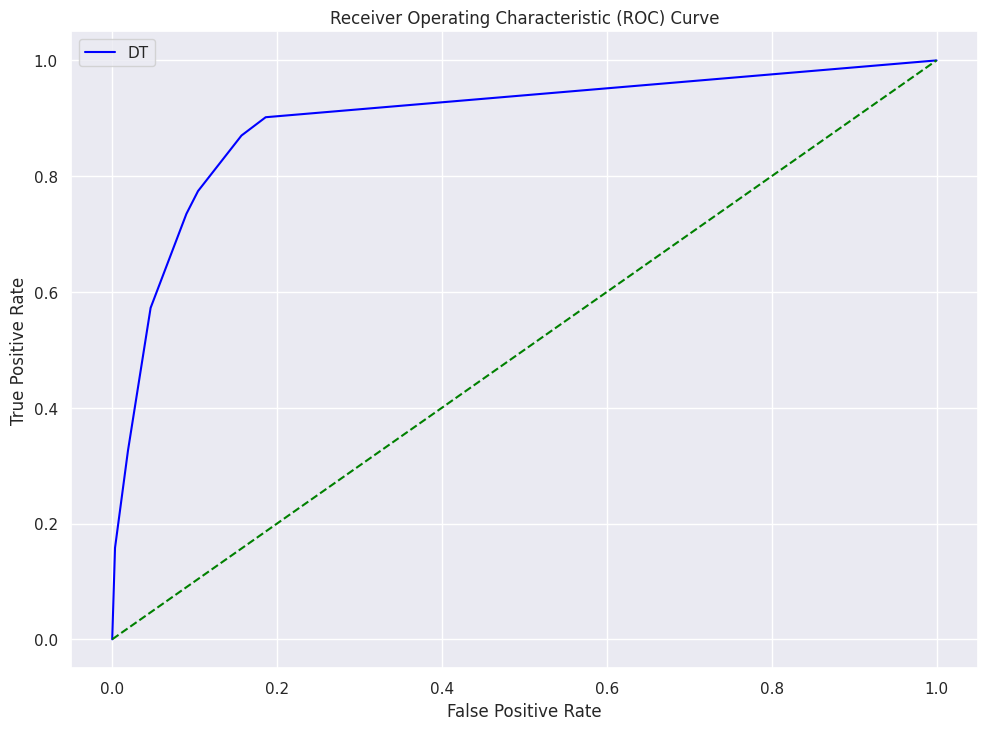

In [90]:
# Plot ROC Curve 

# your codes here...
fpr_DT,tpr_DT,thesholds_DT = roc_curve(y_test,prob_DT)

plt.plot(fpr_DT, tpr_DT, color='blue', label='DT') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()


In [ ]:
# Plot Precision-Recall Curve
from sklearn import metrics

# your codes here...

plt.plot(prec_DT, rec_DT, color='blue', label='DT') 
plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

 
# calculate precision-recall AUC 
# your codes here...


### Training a Naive Bayes Model

In [92]:
# your codes here...
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)

In [93]:
# Model Accuracy

print("Accuracy on training set: {:.3f}".format(model_NB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model__NB.score(X_test, y_test)))

NameError: name 'nb' is not defined

In [ ]:
confusion_majority=confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# Calculate AUC

# your codes here...

print('AUC: %.2f' % auc_NB)

In [ ]:
# Plot ROC Curve 

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()


In [ ]:
prec_NB, rec_NB, threshold_NB = precision_recall_curve(y_test, prob_NB)

plt.plot(prec_NB, rec_NB, color='orange', label='NB') 
plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# calculate precision-recall AUC 
print(metrics.auc(rec_NB, prec_NB))

### Performance Comparison

In [ ]:
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot(fpr_DT, tpr_DT, color='blue', label='DT')  
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [ ]:

plt.plot(prec_DT, rec_DT, color='blue', label='DT') 
plt.plot(prec_NB, rec_NB, color='orange', label='NB') 

plt.plot([1, 0], [0.1, 0.1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()